# import python lib

In [123]:
# All required libraries are imported here for you.
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split , cross_val_score, KFold
from sklearn import metrics
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE
from sklearn.metrics import classification_report, confusion_matrix
# For visualization
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, VotingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint , uniform
from sklearn.naive_bayes import GaussianNB




## import and explore data

In [124]:
Train_data = pd.read_csv("Train.csv")
test_data = pd.read_csv("test.csv")
Train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [125]:
Train_data.info()
Train_data.shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


(891, 12)

In [126]:
Train_data.isna().sum().sort_values(ascending=False)

Cabin          687
Age            177
Embarked         2
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
SibSp            0
Parch            0
Ticket           0
Fare             0
dtype: int64

In [127]:
Train_data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


## Data Analysis

Number of Male: 577
Number of feMale: 314


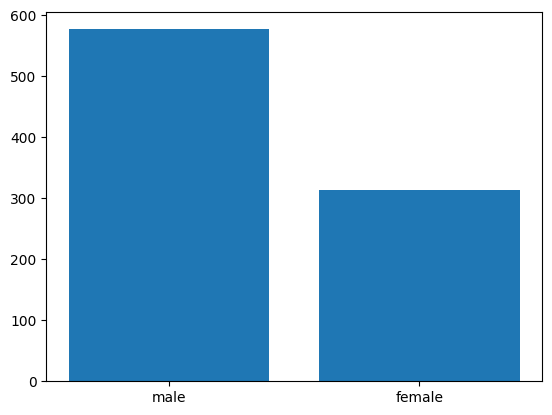

In [128]:
male_count = Train_data['Sex'].value_counts()
male=Train_data[Train_data["Sex"]=="male"]
female=Train_data[Train_data["Sex"]=="female"]

plt.bar( ["male","female"],male_count)
plt.show

print( f"Number of Male: {male_count[0]}"  )
print(f"Number of feMale: {male_count[1]}"   )

Number of who did not survive: 549
Number of survived: 342


0    549
1    342
Name: Survived, dtype: int64

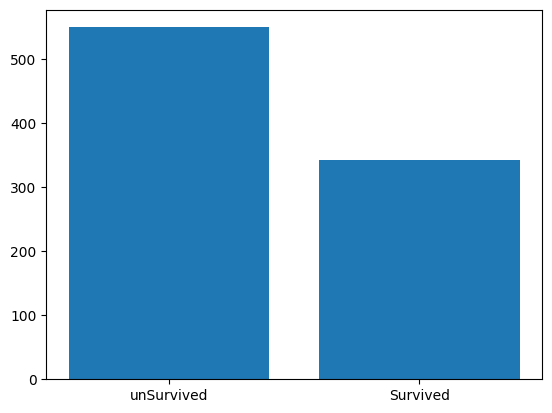

In [129]:
survived_count = Train_data['Survived'].value_counts()
plt.bar(["unSurvived","Survived"], survived_count)
plt.show

print(f"Number of who did not survive: {survived_count[0]}")
print(f"Number of survived: { survived_count[1]}")

survived_count

In [130]:
Train_data["Age"].describe()

count    714.000000
mean      29.699118
std       14.526497
min        0.420000
25%       20.125000
50%       28.000000
75%       38.000000
max       80.000000
Name: Age, dtype: float64

In [131]:
Train_data["Fare"].describe()

count    891.000000
mean      32.204208
std       49.693429
min        0.000000
25%        7.910400
50%       14.454200
75%       31.000000
max      512.329200
Name: Fare, dtype: float64

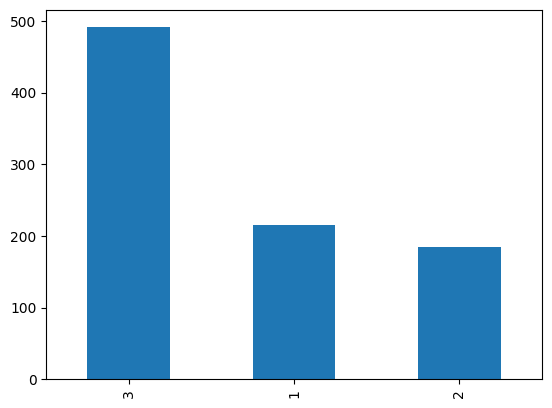

Number of first Class: 216
Number of second Class: 184
Number of third Class: 491


In [132]:
pclass_count = Train_data["Pclass"].value_counts()

pclass_count.plot(kind="bar")
plt.show()

print(f"Number of first Class: {pclass_count[1]}")
print(f"Number of second Class: {pclass_count[2]}")
print(f"Number of third Class: {pclass_count[3]}")


Text(0.5, 1.0, 'Survival Count by Pclass')

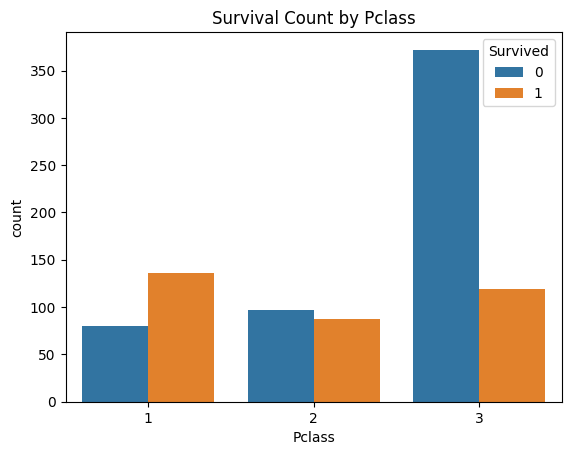

In [133]:


sns.countplot(x='Pclass', hue='Survived', data=Train_data)
plt.title('Survival Count by Pclass')



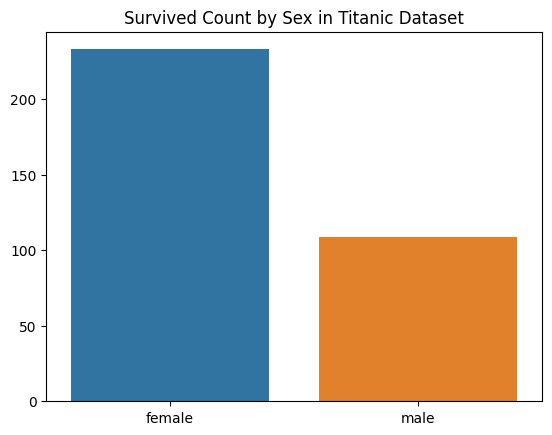

In [134]:
survived_count_by_SEx=Train_data[Train_data["Survived"] ==1]["Sex"].value_counts()

cat=["female","male"]

value=[survived_count_by_SEx["female"],survived_count_by_SEx["male"]]
plt.title('Survived Count by Sex in Titanic Dataset')
sns.barplot(x=cat ,y=value)
plt.show()



Text(0.5, 1.0, 'Survival Count by Sex')

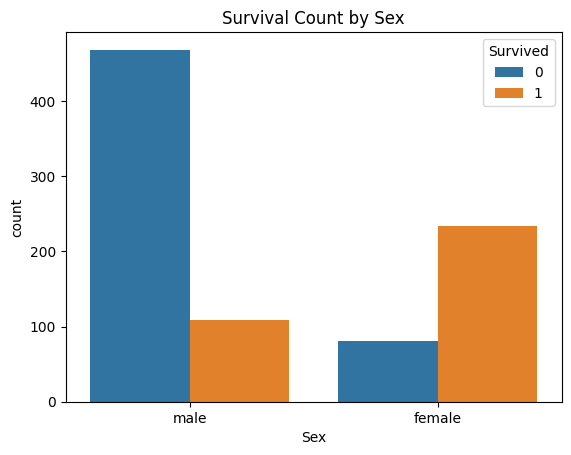

In [135]:
sns.countplot(x='Sex', hue='Survived', data=Train_data)
plt.title('Survival Count by Sex')

Text(0.5, 1.0, 'Distribution of Age')

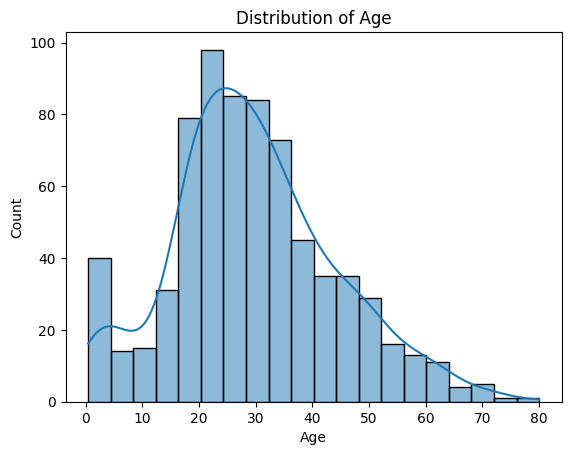

In [136]:
sns.histplot(Train_data['Age'], bins=20, kde=True)
plt.title('Distribution of Age')

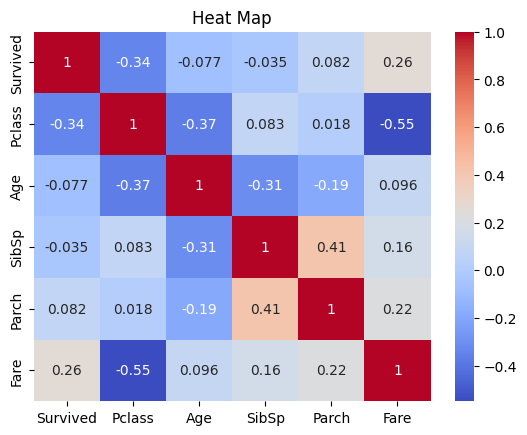

In [137]:

corr_matrix = Train_data[['Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare']].corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Heat Map')
plt.show()

Text(0.5, 1.0, 'Fare Distribution by Pclass')

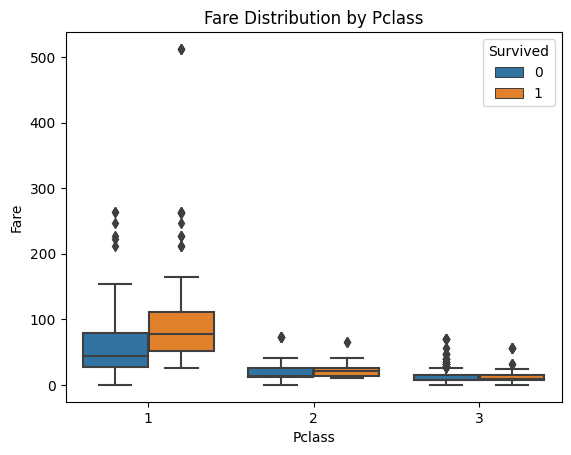

In [138]:
sns.boxplot(x='Pclass', y='Fare', data=Train_data, hue='Survived')
plt.title('Fare Distribution by Pclass')

## Clean Our data && Handeling missing values

In [139]:
train_df = pd.concat([Train_data,test_data], axis =0).reset_index(drop = False)

train_df

,index,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1304,413,1305,NaN,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
1305,414,1306,NaN,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
1306,415,1307,NaN,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
1307,416,1308,NaN,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


In [140]:
train_df = train_df.dropna(subset=['Embarked'])

In [141]:
train_df[train_df["Fare"].isnull()]

,index,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
1043,152,1044,NaN,3,"Storey, Mr. Thomas",male,60.5,0,0,3701,NaN,NaN,S


In [142]:
train_df["Fare"] = train_df["Fare"].fillna(np.mean(train_df[train_df["Pclass"] == 3]["Fare"]))
train_df = train_df.dropna(subset=['Survived'])
train_df['Age'].fillna(train_df['Age'].median(), inplace=True)
train_df.drop(columns=['Cabin'], inplace=True)
print(train_df.isnull().sum())

index          0
PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64


C:\Users\Abdalluh\AppData\Local\Temp\ipykernel_9560\110148062.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_df["Fare"] = train_df["Fare"].fillna(np.mean(train_df[train_df["Pclass"] == 3]["Fare"]))


In [143]:
len(train_df)
train_df

,index,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,886,887,0.0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,S
887,887,888,1.0,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,S
888,888,889,0.0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,28.0,1,2,W./C. 6607,23.4500,S
889,889,890,1.0,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C


## Data preprocessing

In [144]:
X = train_df.drop(columns=['Survived'])
y = train_df['Survived']
X = X[['Pclass','Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked']]
X_encoded = pd.get_dummies(X, columns=['Sex', 'Embarked'], drop_first=True)
X_encoded

,Pclass,Age,SibSp,Parch,Fare,Sex_male,Embarked_Q,Embarked_S
0,3,22.0,1,0,7.2500,1,0,1
1,1,38.0,1,0,71.2833,0,0,0
2,3,26.0,0,0,7.9250,0,0,1
3,1,35.0,1,0,53.1000,0,0,1
4,3,35.0,0,0,8.0500,1,0,1
...,...,...,...,...,...,...,...,...
886,2,27.0,0,0,13.0000,1,0,1
887,1,19.0,0,0,30.0000,0,0,1
888,3,28.0,1,2,23.4500,0,0,1
889,1,26.0,0,0,30.0000,1,0,0


### Handle imbalance class

In [145]:
# Initialize SMOTE
smote = SMOTE(random_state=42)
# Apply SMOTE to balance the dataset
X_resampled, y_resampled = smote.fit_resample(X_encoded, y)

X_resampled

,Pclass,Age,SibSp,Parch,Fare,Sex_male,Embarked_Q,Embarked_S
0,3,22.000000,1,0,7.250000,1,0,1
1,1,38.000000,1,0,71.283300,0,0,0
2,3,26.000000,0,0,7.925000,0,0,1
3,1,35.000000,1,0,53.100000,0,0,1
4,3,35.000000,0,0,8.050000,1,0,1
...,...,...,...,...,...,...,...,...
1093,1,23.644027,0,0,67.184917,0,0,0
1094,1,25.484308,1,0,54.874648,1,0,0
1095,2,6.028787,0,1,33.053976,0,0,1
1096,2,31.116073,0,0,13.000000,0,0,1


In [146]:
X_train, X_test, y_train, y_test = train_test_split (X_resampled,y_resampled ,shuffle=True,test_size=0.2,random_state=23)

print(f'X_train shape: {X_train.shape}')
print(f'X_val shape: {X_test.shape}')
print(f'y_train shape: {y_train.shape}')
print(f'y_val shape: {y_test.shape}')

X_train shape: (878, 8)
X_val shape: (220, 8)
y_train shape: (878,)
y_val shape: (220,)


In [147]:
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Modeling

### perform RandomizedSearchCV

In [158]:
# Define models
models = {
    'RandomForest': RandomForestClassifier(random_state=42),
    'GradientBoosting': GradientBoostingClassifier(random_state=42),
    'LogisticRegression': LogisticRegression(max_iter=1000, random_state=42),
    'KNN': KNeighborsClassifier(),
    'SVM': SVC(probability=True, random_state=42)
}

# Define parameter grids for RandomizedSearchCV
param_grids = {
    'RandomForest': {
        'n_estimators': randint(50, 200),
        'max_features': ['auto', 'sqrt', 'log2'],
        'max_depth': randint(10, 50),
        'min_samples_split': randint(2, 10),
        'min_samples_leaf': randint(1, 10)
    },
    'GradientBoosting': {
        'n_estimators': randint(50, 200),
        'learning_rate': uniform(0.01, 0.1),
        'max_depth': randint(3, 10),
        'min_samples_split': randint(2, 10),
        'min_samples_leaf': randint(1, 10)
    },
    'LogisticRegression': {
        'C': uniform(0.01, 10),
        'penalty': ['l1', 'l2'],
        'solver': ['liblinear', 'saga']
    },
    'KNN': {
        'n_neighbors': randint(3, 20),
        'weights': ['uniform', 'distance'],
        'metric': ['euclidean', 'manhattan', 'minkowski']
    },
    'SVM': {
        'C': uniform(0.01, 10),
        'kernel': ['linear', 'rbf', 'poly'],
        'gamma': uniform(0.001, 0.1)
    }
}


# Initialize and perform RandomizedSearchCV
best_models = {}
for model_name, model in models.items():
    random_search = RandomizedSearchCV(estimator=model, param_distributions=param_grids[model_name],
                                       n_iter=100, cv=5, verbose=2, random_state=42, n_jobs=-1)
    random_search.fit(X_train_scaled, y_train)
    best_models[model_name] = random_search.best_estimator_
    print(f"Best parameters for {model_name}:        {random_search.best_params_}")

Fitting 5 folds for each of 100 candidates, totalling 500 fits


c:\Users\Abdalluh\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\model_selection\_validation.py:425: FitFailedWarning: 
175 fits failed out of a total of 500.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
107 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\Abdalluh\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\model_selection\_validation.py", line 729, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\Abdalluh\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py", line 1145, in wrapper
    estimator._validate_params()
  File "c:\Users\Abdalluh\AppData\Local\Programs\Python\Python310\lib\site-packages\

Best parameters for RandomForest:        {'max_depth': 13, 'max_features': 'log2', 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 177}
Fitting 5 folds for each of 100 candidates, totalling 500 fits
Best parameters for GradientBoosting:        {'learning_rate': 0.037083225126207424, 'max_depth': 6, 'min_samples_leaf': 7, 'min_samples_split': 3, 'n_estimators': 166}
Fitting 5 folds for each of 100 candidates, totalling 500 fits
Best parameters for LogisticRegression:        {'C': 0.2641912674409519, 'penalty': 'l1', 'solver': 'liblinear'}
Fitting 5 folds for each of 100 candidates, totalling 500 fits
Best parameters for KNN:        {'metric': 'manhattan', 'n_neighbors': 5, 'weights': 'uniform'}
Fitting 5 folds for each of 100 candidates, totalling 500 fits
Best parameters for SVM:        {'C': 9.634472949421111, 'gamma': 0.02617822958253642, 'kernel': 'rbf'}


In [149]:
best_models

{'RandomForest': RandomForestClassifier(max_depth=28, min_samples_leaf=2, min_samples_split=6,
                        n_estimators=117, random_state=42),
 'GradientBoosting': GradientBoostingClassifier(learning_rate=0.08555511385430487, max_depth=6,
                            min_samples_leaf=7, min_samples_split=4,
                            n_estimators=135, random_state=42),
 'LogisticRegression': LogisticRegression(C=0.2641912674409519, max_iter=1000, penalty='l1',
                    random_state=42, solver='liblinear'),
 'KNN': KNeighborsClassifier(metric='manhattan'),
 'SVM': SVC(C=9.634472949421111, gamma=0.02617822958253642, probability=True,
     random_state=42)}

### Evaluate models

Classification Report for RandomForest:
               precision    recall  f1-score   support

         0.0       0.83      0.87      0.85       110
         1.0       0.87      0.82      0.84       110

    accuracy                           0.85       220
   macro avg       0.85      0.85      0.85       220
weighted avg       0.85      0.85      0.85       220

Confusion Matrix for RandomForest:
 [[96 14]
 [20 90]]


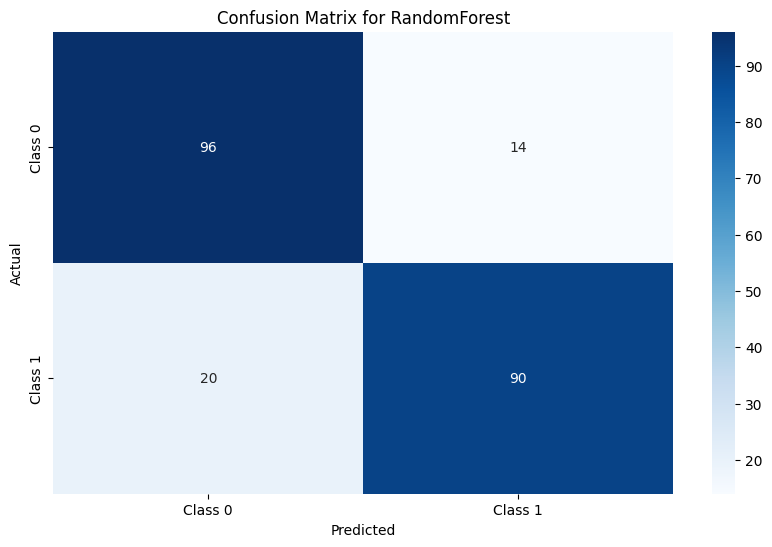

Classification Report for GradientBoosting:
               precision    recall  f1-score   support

         0.0       0.84      0.88      0.86       110
         1.0       0.88      0.83      0.85       110

    accuracy                           0.85       220
   macro avg       0.86      0.85      0.85       220
weighted avg       0.86      0.85      0.85       220

Confusion Matrix for GradientBoosting:
 [[97 13]
 [19 91]]


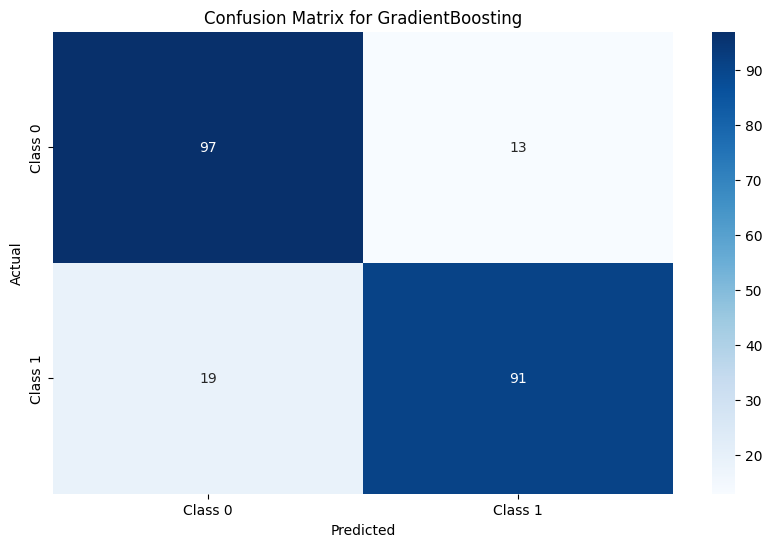

Classification Report for LogisticRegression:
               precision    recall  f1-score   support

         0.0       0.82      0.83      0.82       110
         1.0       0.83      0.82      0.82       110

    accuracy                           0.82       220
   macro avg       0.82      0.82      0.82       220
weighted avg       0.82      0.82      0.82       220

Confusion Matrix for LogisticRegression:
 [[91 19]
 [20 90]]


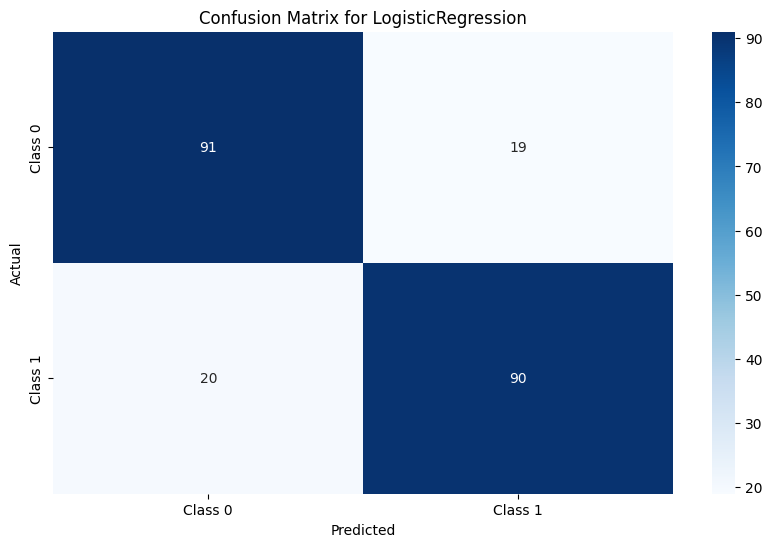

Classification Report for KNN:
               precision    recall  f1-score   support

         0.0       0.86      0.86      0.86       110
         1.0       0.86      0.85      0.86       110

    accuracy                           0.86       220
   macro avg       0.86      0.86      0.86       220
weighted avg       0.86      0.86      0.86       220

Confusion Matrix for KNN:
 [[95 15]
 [16 94]]


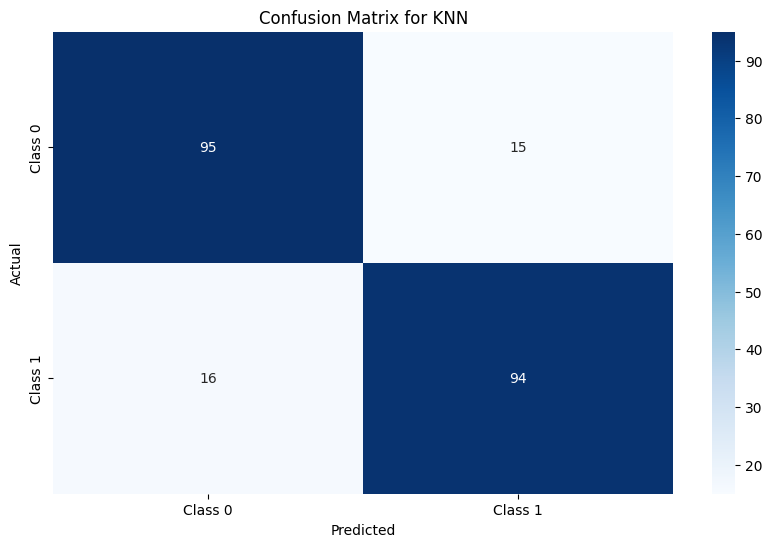

Classification Report for SVM:
               precision    recall  f1-score   support

         0.0       0.83      0.90      0.86       110
         1.0       0.89      0.82      0.85       110

    accuracy                           0.86       220
   macro avg       0.86      0.86      0.86       220
weighted avg       0.86      0.86      0.86       220

Confusion Matrix for SVM:
 [[99 11]
 [20 90]]


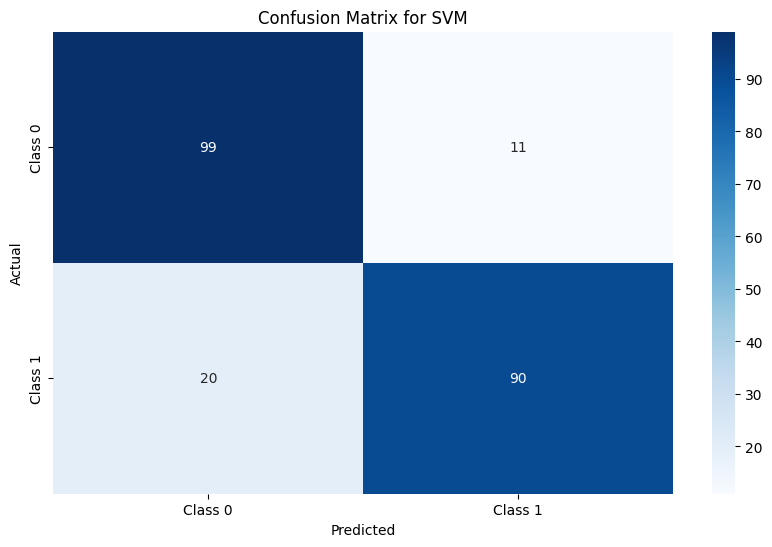

In [150]:
results = []

# Evaluate models
for model_name, best_model in best_models.items():
    y_pred = best_model.predict(X_test_scaled)
    print(f"Classification Report for {model_name}:\n", classification_report(y_test, y_pred))
    print(f"Confusion Matrix for {model_name}:\n", confusion_matrix(y_test, y_pred))
    results.append (metrics.accuracy_score(y_test, y_pred))


    
    plt.figure(figsize=(10, 6))
    sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues', 
                xticklabels=['Class 0', 'Class 1'], yticklabels=['Class 0', 'Class 1'])
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title(f'Confusion Matrix for {model_name}')
    plt.show()

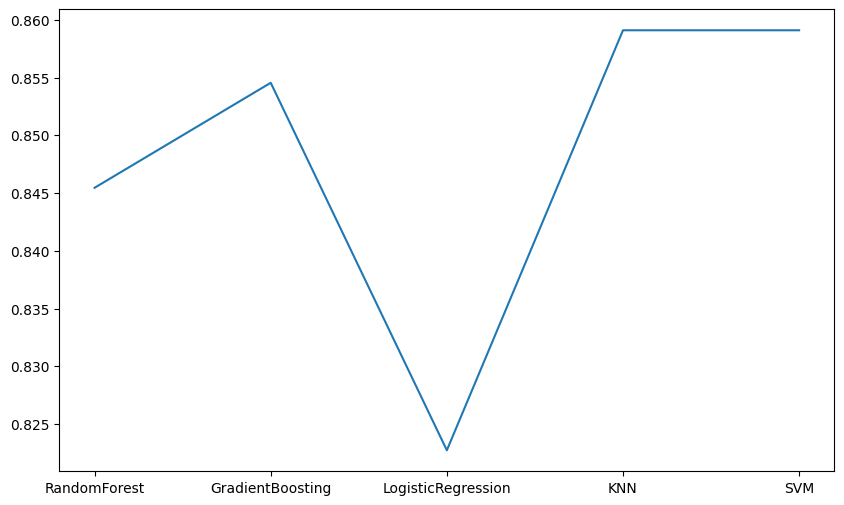

dict_keys(['RandomForest', 'GradientBoosting', 'LogisticRegression', 'KNN', 'SVM'])


[0.8454545454545455,
 0.8545454545454545,
 0.8227272727272728,
 0.8590909090909091,
 0.8590909090909091]

In [151]:
plt.figure(figsize=(10, 6))
sns.lineplot(x=['RandomForest', 'GradientBoosting', 'LogisticRegression', 'KNN', 'SVM'], y=results)
plt.show()



print(models.keys())
results

### VotingClassifier

Classification Report for Voting Classifier:
               precision    recall  f1-score   support

         0.0       0.85      0.89      0.87       110
         1.0       0.89      0.85      0.87       110

    accuracy                           0.87       220
   macro avg       0.87      0.87      0.87       220
weighted avg       0.87      0.87      0.87       220

Confusion Matrix for Voting Classifier:
 [[98 12]
 [17 93]]


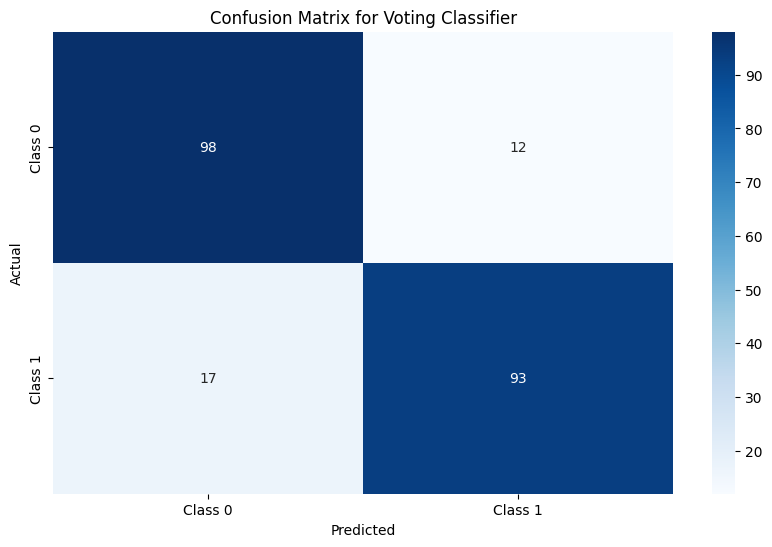

In [152]:

# Adding Naive Bayes
best_models['NaiveBayes'] = GaussianNB()


voting_clf = VotingClassifier(estimators=[
    ('rf', best_models['RandomForest']),
    ('gb', best_models['GradientBoosting']),
    ('lr', best_models['LogisticRegression']),
    ('knn', best_models['KNN']),
    ('svm', best_models['SVM']),
    ('nb', best_models['NaiveBayes'])
], voting='soft')

# Train the Voting Classifier
voting_clf.fit(X_train_scaled, y_train)

# Make predictions and evaluate the Voting Classifier
y_pred = voting_clf.predict(X_test_scaled)

print("Classification Report for Voting Classifier:\n", classification_report(y_test, y_pred))
print("Confusion Matrix for Voting Classifier:\n", confusion_matrix(y_test, y_pred))


plt.figure(figsize=(10, 6))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues', 
            xticklabels=['Class 0', 'Class 1'], yticklabels=['Class 0', 'Class 1'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix for Voting Classifier')
plt.show()

# submission

In [153]:
test_data["Fare"] = test_data["Fare"].fillna(np.mean(test_data[test_data["Pclass"] == 3]["Fare"]))

test_data['Age'].fillna(test_data['Age'].median(), inplace=True)


In [154]:
test_datax = test_data[['Pclass','Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked']]
Test_encoded = pd.get_dummies(test_datax, columns=['Sex', 'Embarked'], drop_first=True)
Test_encoded

,Pclass,Age,SibSp,Parch,Fare,Sex_male,Embarked_Q,Embarked_S
0,3,34.5,0,0,7.8292,1,1,0
1,3,47.0,1,0,7.0000,0,0,1
2,2,62.0,0,0,9.6875,1,1,0
3,3,27.0,0,0,8.6625,1,0,1
4,3,22.0,1,1,12.2875,0,0,1
...,...,...,...,...,...,...,...,...
413,3,27.0,0,0,8.0500,1,0,1
414,1,39.0,0,0,108.9000,0,0,0
415,3,38.5,0,0,7.2500,1,0,1
416,3,27.0,0,0,8.0500,1,0,1


In [155]:

test_data_scaled = scaler.transform(Test_encoded)

In [156]:
# Adding Naive Bayes
best_models['NaiveBayes'] = GaussianNB()


voting_clf = VotingClassifier(estimators=[
    ('rf', best_models['RandomForest']),
    ('gb', best_models['GradientBoosting']),
    ('lr', best_models['LogisticRegression']),
    ('knn', best_models['KNN']),
    ('svm', best_models['SVM']),
    ('nb', best_models['NaiveBayes'])
], voting='soft')

# Train the Voting Classifier
voting_clf.fit(X_train_scaled, y_train)

# Make predictions and evaluate the Voting Classifier
y_pred = voting_clf.predict(test_data_scaled)



In [157]:
output = pd.DataFrame({'PassengerId': test_data.PassengerId, 'Survived': y_pred})
output.to_csv('submission.csv', index=False)


In [159]:
output

,PassengerId,Survived
0,892,0.0
1,893,1.0
2,894,0.0
3,895,0.0
4,896,1.0
...,...,...
413,1305,0.0
414,1306,1.0
415,1307,0.0
416,1308,0.0
